In [1]:
from statistics import correlation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-pastel")

sns.set_theme(
    style="whitegrid",
    palette="pastel",
    context="notebook"
)

In [2]:
df = pd.read_csv("yellow_tripdata_2016-03.csv")

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [4]:
df.shape

(12210952, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12210952 entries, 0 to 12210951
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   pickup_longitude       float64
 6   pickup_latitude        float64
 7   RatecodeID             int64  
 8   store_and_fwd_flag     object 
 9   dropoff_longitude      float64
 10  dropoff_latitude       float64
 11  payment_type           int64  
 12  fare_amount            float64
 13  extra                  float64
 14  mta_tax                float64
 15  tip_amount             float64
 16  tolls_amount           float64
 17  improvement_surcharge  float64
 18  total_amount           float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.7+ GB


In [6]:
df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07
mean,1.530647e+00,1.659580e+00,6.131770e+00,-7.287133e+01,4.014349e+01,1.040395e+00,-7.293679e+01,4.018050e+01,1.340920e+00,1.279508e+01,3.455600e-01,4.976363e-01,1.792582e+00,3.152554e-01,2.997199e-01,1.604582e+01
std,4.990599e-01,1.312189e+00,6.156483e+03,8.964108e+00,4.937996e+00,5.807342e-01,8.696974e+00,4.790940e+00,4.902621e-01,1.340979e+02,4.563069e-01,4.863319e-02,2.549124e+00,1.751526e+00,1.230647e-02,1.343578e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,-1.616987e+02,0.000000e+00,1.000000e+00,-1.616987e+02,0.000000e+00,1.000000e+00,-3.760000e+02,-5.850000e+01,-1.000000e+00,-2.000000e+01,-1.604000e+01,-3.000000e-01,-3.763000e+02
25%,1.000000e+00,1.000000e+00,1.000000e+00,-7.399174e+01,4.073630e+01,1.000000e+00,-7.399125e+01,4.073462e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.750000e+00
50%,2.000000e+00,1.000000e+00,1.700000e+00,-7.398161e+01,4.075325e+01,1.000000e+00,-7.397961e+01,4.075375e+01,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.350000e+00,0.000000e+00,3.000000e-01,1.180000e+01
75%,2.000000e+00,2.000000e+00,3.180000e+00,-7.396678e+01,4.076765e+01,1.000000e+00,-7.396228e+01,4.076910e+01,2.000000e+00,1.450000e+01,5.000000e-01,5.000000e-01,2.360000e+00,0.000000e+00,3.000000e-01,1.776000e+01
max,2.000000e+00,9.000000e+00,1.907263e+07,0.000000e+00,6.685682e+01,9.900000e+01,0.000000e+00,5.079786e+01,4.000000e+00,4.294967e+05,8.000000e+01,7.930000e+01,8.500000e+02,1.410320e+03,3.000000e-01,4.295622e+05


In [7]:
df.describe(include='O')

,tpep_pickup_datetime,tpep_dropoff_datetime,store_and_fwd_flag
count,12210952,12210952,12210952
unique,2462580,2466342,2
top,2016-03-06 00:44:32,2016-03-26 00:00:00,N
freq,28,101,12144057


In [8]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [9]:
df['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour
df['pickup_day'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.day
df['pickup_month'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.month
df['pickup_year'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.year

In [10]:
# unique values in each column
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

VendorID: 2
tpep_pickup_datetime: 2462580
tpep_dropoff_datetime: 2466342
passenger_count: 10
trip_distance: 4501
pickup_longitude: 35194
pickup_latitude: 62643
RatecodeID: 7
store_and_fwd_flag: 2
dropoff_longitude: 54703
dropoff_latitude: 88408
payment_type: 4
fare_amount: 1914
extra: 45
mta_tax: 16
tip_amount: 3561
tolls_amount: 995
improvement_surcharge: 10
total_amount: 11408
pickup_hour: 24
pickup_day: 31
pickup_month: 1
pickup_year: 1


In [11]:
df['store_and_fwd_flag'].unique()

array(['N', 'Y'], dtype=object)

In [12]:
df['pickup_month'].unique()

array([3], dtype=int32)

In [13]:
df['pickup_year'].unique()

array([2016], dtype=int32)

In [14]:
df['VendorID'].unique()

array([1, 2])

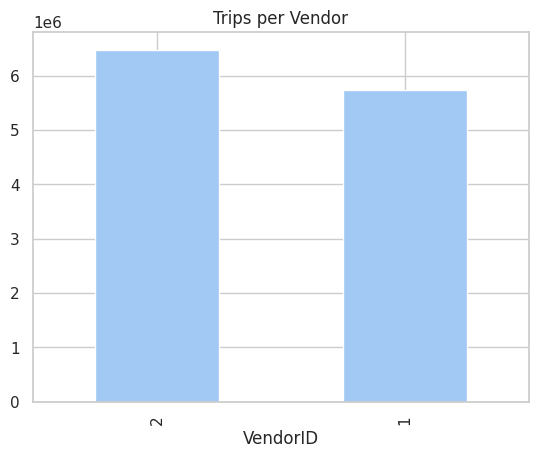

In [15]:
#trips per vendor
df['VendorID'].value_counts().plot(
    kind='bar',
    title='Trips per Vendor'
)
plt.show()

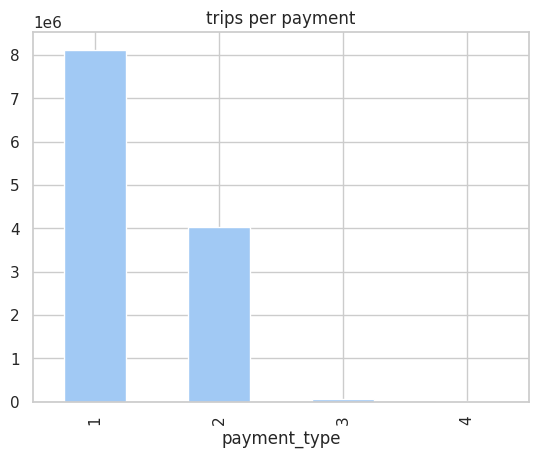

In [16]:
#trips per payment
df['payment_type'].value_counts().plot(
    kind='bar',
    title='trips per payment'
)
plt.show()

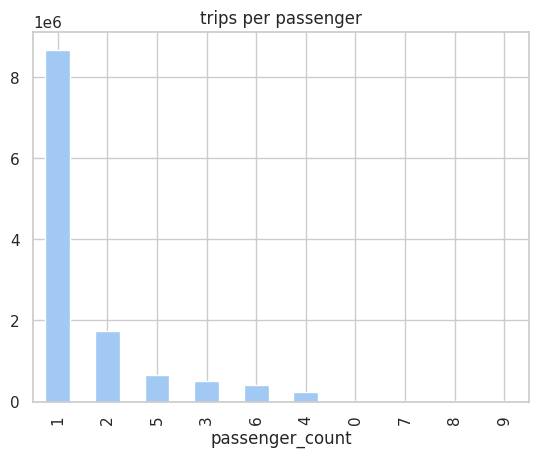

In [17]:
#trips per passenger
df['passenger_count'].value_counts().plot(
    kind='bar',
    title='trips per passenger'
)
plt.show()

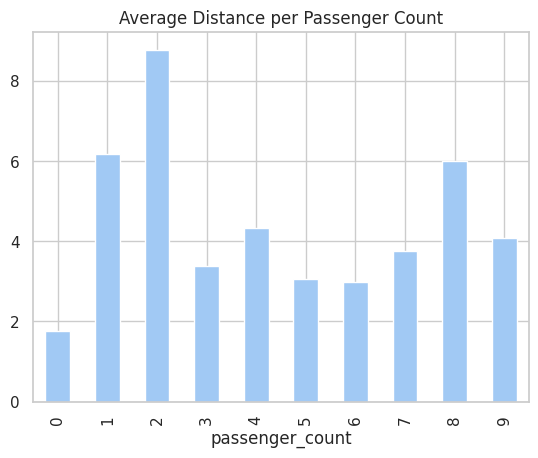

In [18]:
#avarage distance per passenger count
df.groupby('passenger_count')['trip_distance'].mean().plot(
    kind='bar',
    title='Average Distance per Passenger Count'
)
plt.show()

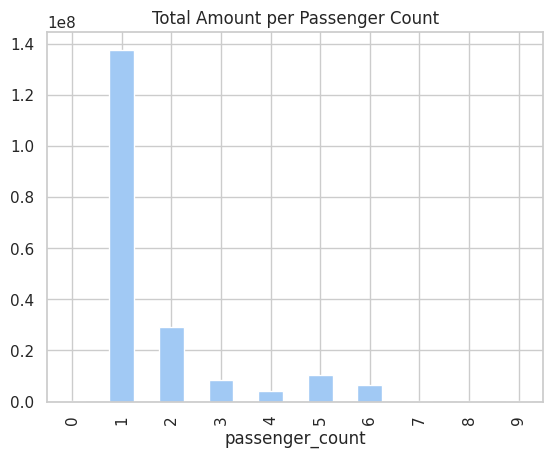

In [19]:
df.groupby('passenger_count')['total_amount'].sum().plot(
    kind='bar',
    title='Total Amount per Passenger Count'
)
plt.show()

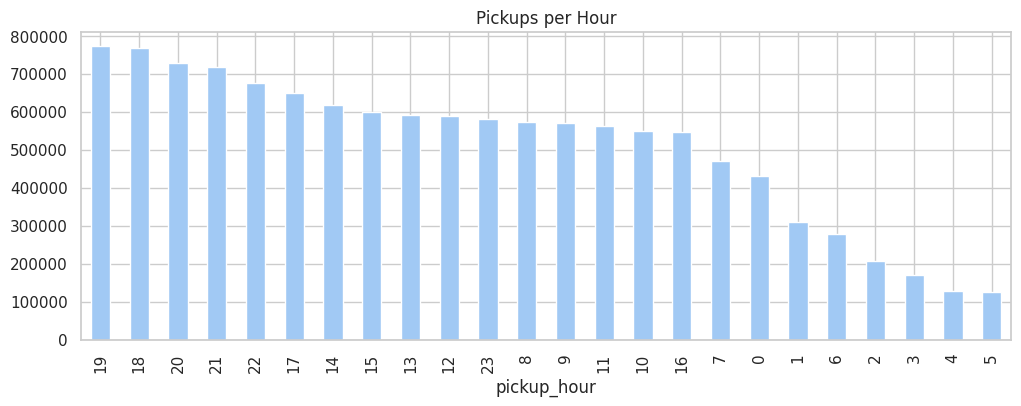

In [20]:
#pickups per hours
df['pickup_hour'].value_counts().plot(
    kind='bar',
    title='Pickups per Hour',
    figsize=(12,4)
)
plt.show()

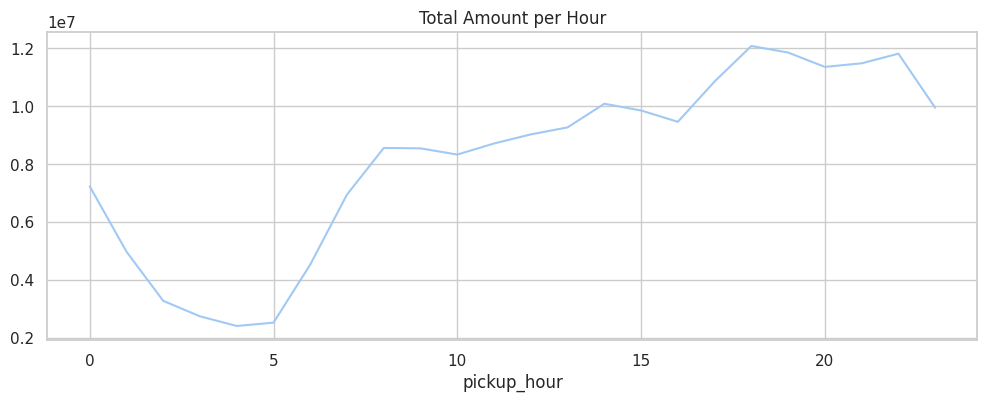

In [21]:
#total amount per hour
df.groupby('pickup_hour')['total_amount'].sum().plot(
    kind='line',
    title='Total Amount per Hour',
    figsize=(12,4)
)
plt.show()

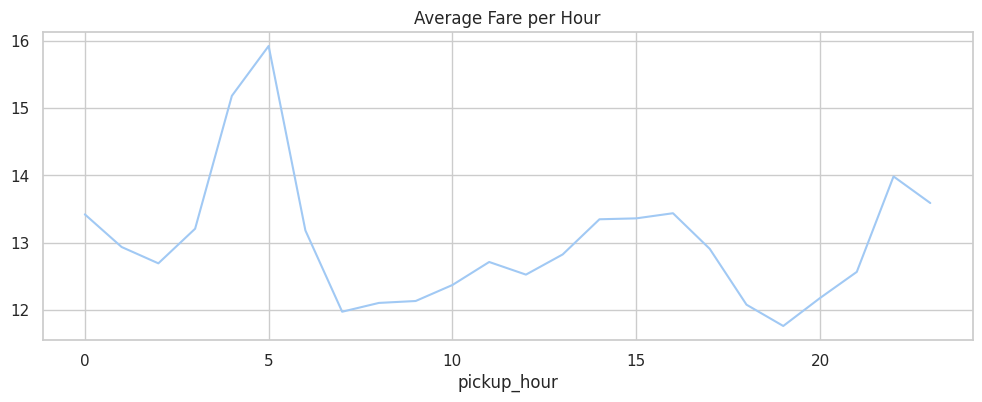

In [22]:
#avarage fare per hour
df.groupby('pickup_hour')['fare_amount'].mean().plot(
    kind='line',
    title='Average Fare per Hour',
    figsize=(12,4)
)
plt.show()

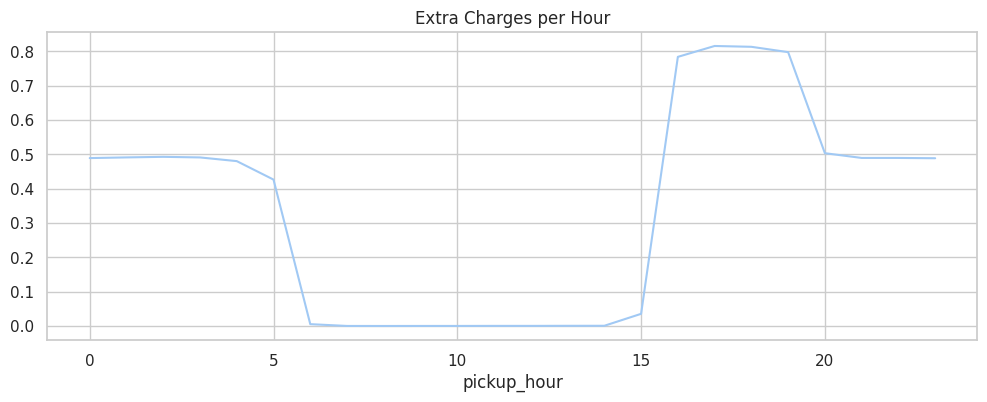

In [23]:
#extra charges per hours
df.groupby('pickup_hour')['extra'].mean().plot(
    kind='line',
    title='Extra Charges per Hour',
    figsize=(12,4)
)
plt.show()

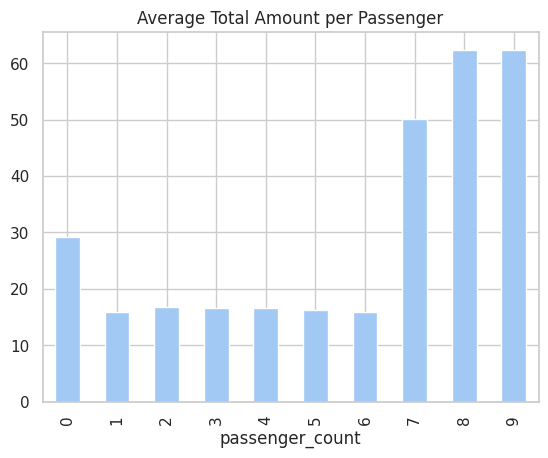

In [24]:
#avarage total amount per passenger
df.groupby('passenger_count')['total_amount'].mean().plot(
    kind='bar',
    title='Average Total Amount per Passenger'
)
plt.show()

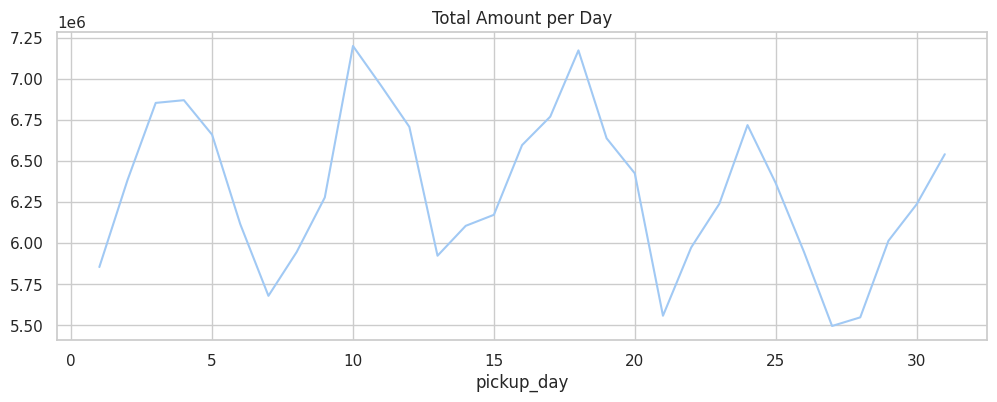

In [25]:
#total amount per day
df.groupby('pickup_day')['total_amount'].sum().plot(
    kind='line',
    title='Total Amount per Day',
    figsize=(12,4)
)
plt.show()

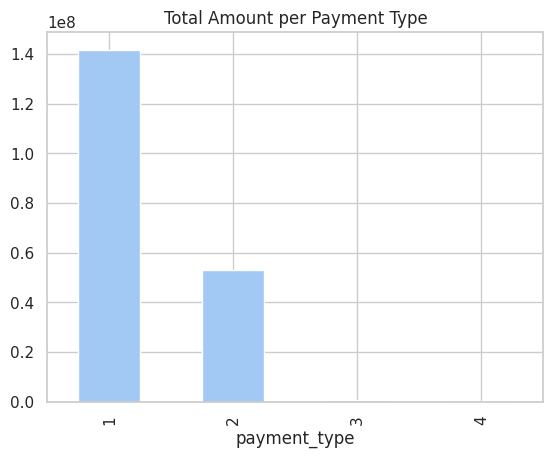

In [26]:
#total amount per payment type
df.groupby('payment_type')['total_amount'].sum().plot(
    kind='bar',
    title='Total Amount per Payment Type'
)
plt.show()

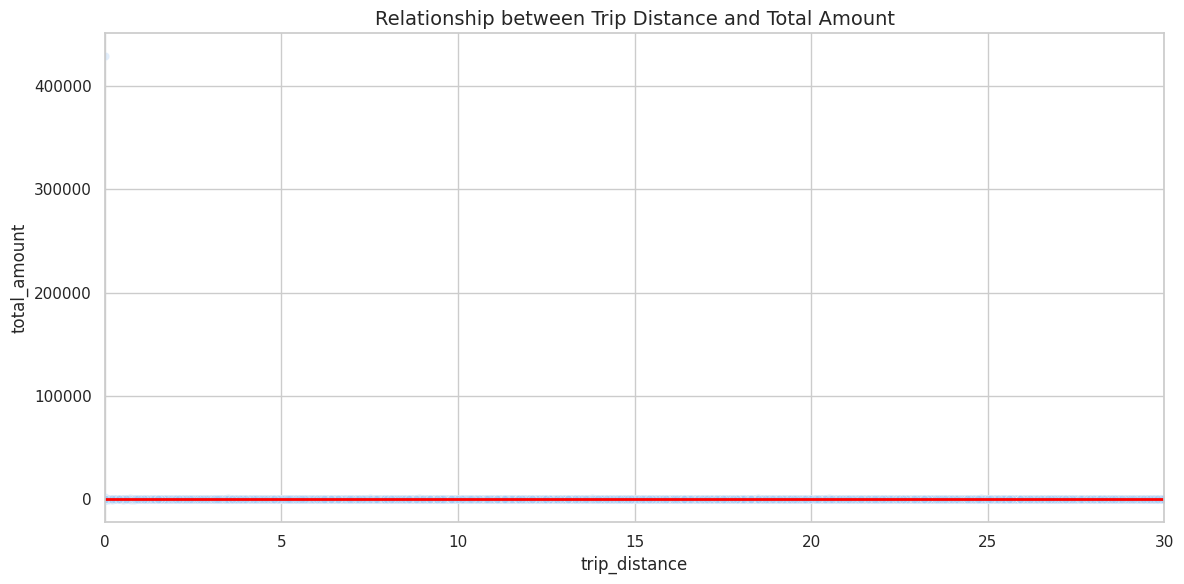

In [27]:
# Create a scatter plot of trip distance vs total amount
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='trip_distance', y='total_amount', alpha=0.3)

# Add labels and title
plt.title('Relationship between Trip Distance and Total Amount', fontsize=14)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Total Amount ($)')

# Set x-axis limit to focus on the majority of the data
plt.xlim(0, 30)  # Adjust this based on your data distribution

# Add a regression line to show the trend
sns.regplot(data=df, x='trip_distance', y='total_amount',
            scatter=False, color='red', line_kws={'linewidth': 2})

plt.tight_layout()
plt.show()

In [28]:
#correlations
numeric_colums = df.select_dtypes(include='number').columns
#drop pickup_month, pickup_year,VendorID, pickup and dropoff longitude and latitude,
numeric_colums = numeric_colums.drop(['pickup_month', 'pickup_year','VendorID','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'])

In [29]:
correlation = df[numeric_colums].corr()
correlation

,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hour,pickup_day
passenger_count,1.000000,-0.000140,-0.006438,0.013144,0.000957,0.002239,0.004361,-0.004512,0.008678,-0.002305,0.000992,0.007693,0.007053
trip_distance,-0.000140,1.000000,0.000120,0.000489,0.003864,0.000690,-0.000029,0.000347,0.000414,-0.000193,0.003871,0.000252,-0.000208
RatecodeID,-0.006438,0.000120,1.000000,-0.000065,0.021220,0.018629,-0.248996,0.139849,0.163864,-0.087813,0.025933,-0.006069,0.002092
payment_type,0.013144,0.000489,-0.000065,1.000000,-0.004487,-0.016435,-0.030941,-0.488982,-0.032999,-0.073972,-0.014259,-0.015856,0.018548
fare_amount,0.000957,0.003864,0.021220,-0.004487,1.000000,0.058072,-0.014797,0.045592,0.039606,-0.005251,0.999639,-0.000212,0.000611
extra,0.002239,0.000690,0.018629,-0.016435,0.058072,1.000000,0.014594,0.062654,0.041720,0.032002,0.063097,0.310438,0.002428
mta_tax,0.004361,-0.000029,-0.248996,-0.030941,-0.014797,0.014594,1.000000,-0.093832,-0.162768,0.393423,-0.018222,0.011345,0.000057
tip_amount,-0.004512,0.000347,0.139849,-0.488982,0.045592,0.062654,-0.093832,1.000000,0.352261,0.014213,0.069249,0.015568,-0.006073
tolls_amount,0.008678,0.000414,0.163864,-0.032999,0.039606,0.041720,-0.162768,0.352261,1.000000,0.004056,0.059332,-0.002433,0.004380
improvement_surcharge,-0.002305,-0.000193,-0.087813,-0.073972,-0.005251,0.032002,0.393423,0.014213,0.004056,1.000000,-0.004576,0.003926,0.000325


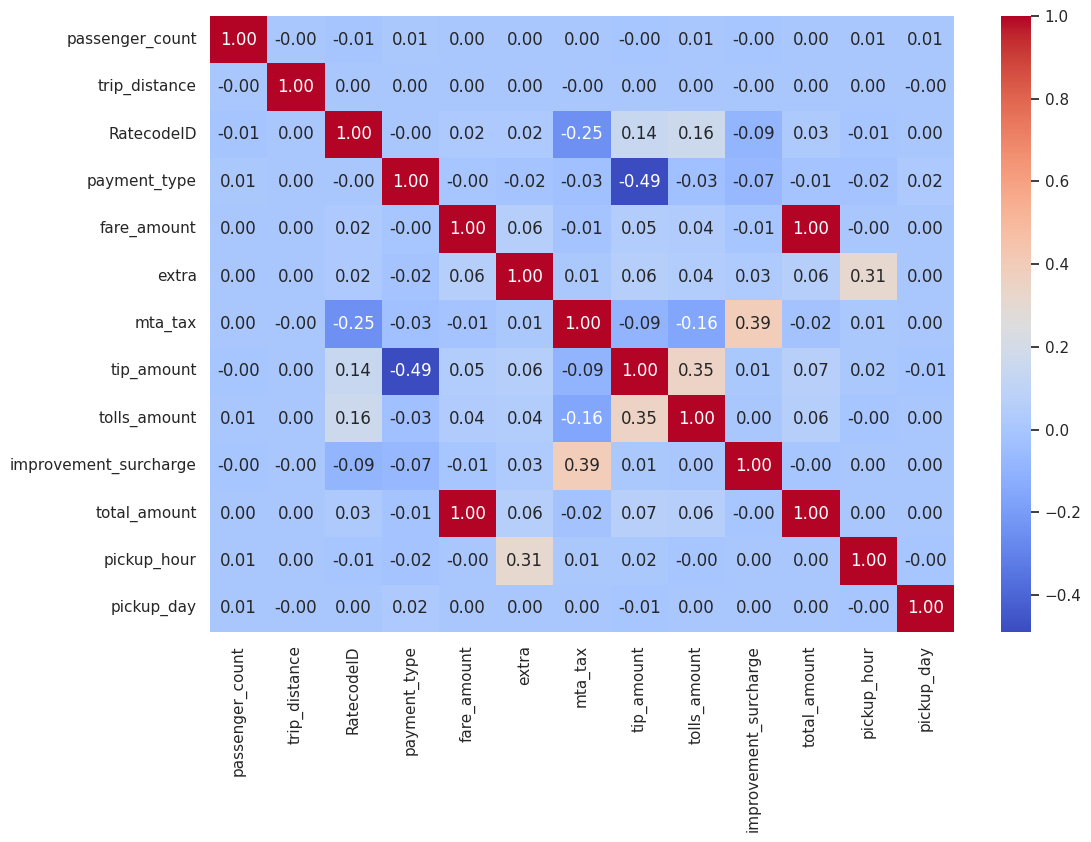

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm',fmt=".2f")
plt.show()

In [31]:
# #pair plots
# sns.pairplot(df[numeric_colums])
# plt.show()
#gand lagwa di is ploting ne meri itne bade dataset mai ye aage se galti se bhi mat chalana ram cpu gpu sab max use kar ke laptop hang kar dega